In [1]:
import os
import json
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re

In [2]:
plt.rc('font', family='Times New Roman')

In [3]:
def read_tf_loss(tf_file, target):
    record_loss = []
    for event in tf.compat.v1.train.summary_iterator(tf_file):
        for value in event.summary.value:
            if value.tag == target:
                record_loss.append(float(value.simple_value))
    return record_loss

In [4]:
def get_recall1_sketchy(log_dir):
    recall_1 = []
    with open(log_dir) as f:
        lines = f.readlines()
        for line in lines:
            line = line.strip('\n')
            line = line.replace(' ', '')
            matchObj = re.match(r'recall@1:(.*)recall@5.*', line, re.M | re.I)
            if matchObj:
                recall = float(matchObj.group(1))
                recall_1.append(recall)
    return np.asarray(recall_1)


In [5]:
def get_recall1_list(log_dir, choose_idx=None):
    recall_1 = []

    start = False
    epochs = 0
    with open(log_dir, 'r') as f:
        lines = f.readlines()
        line_num = 0
        for line in lines:
            if epochs == 1000:
                break
            line = line.strip('\n')
            line = line.replace('\t', '')
            if start:
                line_num += 1
                if line_num % 5 == 2:
                    line_sp = line.split(' ')
                    # print(line_sp)
                    # exit(0)
                    recall_1.append(float(line_sp[-2][9:]))

                    epochs += 1
            if 'optimizer' in line:
                start = True
    return np.asarray(recall_1)[choose_idx] if choose_idx is not None else np.asarray(recall_1)


In [6]:
def get_recall1_list_v2(log_dir, choose_idx=None):
    recall_1 = []

    start = False
    epochs = 0
    with open(log_dir, 'r') as f:
        lines = f.readlines()
        line_num = 0
        for line in lines:
            if epochs == 1000:
                break
            line = line.strip('\n')
            line = line.replace('\t', '')
            if start:
                line_num += 1
                if line_num % 3 == 2:
                    line_sp = line.split(' ')
                    # print(line_sp)
                    # exit(0)
                    recall_1.append(float(line_sp[-2][9:]))

                    epochs += 1
            if 'optimizer' in line:
                start = True
    return np.asarray(recall_1)[choose_idx] if choose_idx is not None else np.asarray(recall_1)


In [7]:
tfevent_home = '/mnt/sde/data/xxl/sketchX_tensorboard_home/'

In [8]:
SHOEV1_LOG_DIR = ['imgnet_m01'                   , 'mocoV2_fair_shoev1_m01'            , 'mocoV2_my_m01'                   , 'rnd_edge_new_shoev1_m01'               ,  'rnd_mix_real_shoev1_m01'                   , 'rnd_mix_edge_shoev1_m01'            ]
SHOEV2_LOG_DIR = ['imgcls_shoev2_new_dataset_m01', 'mocoV2_fair_shoev2_new_dataset_m01', 'mocoV2_my_shoev2_new_dataset_m01', 'rnd_edge_shoev2_new_dataset_m01'       ,  'rnd_mix_real_shoev2_new_dataset_m01'       , 'rnd_mix_edge_shoev2_new_dataset_m01']
CHAIR_LOG_DIR  = ['resnet_chair_m01'             , 'mocoV2_fair_chair_m01'             , 'mocoV2_my_chair_m01'             , 'rnd_edge_new_chair_m01'                ,  'rnd_mix_real_chair_m01'                    , 'rnd_mix_edge_chair_m01'             ]
SKETCHY_LOG_DIR= ['imgnet_cls'                   , 'mocoV2_fair'                       , 'mocoV2_my_200'                   , 'rnd_edge_real_200'                     ,  'rnd_mix_real_200'                          , 'rnd_mix_or_edge_200'                ]

In [9]:
LOGS = [SKETCHY_LOG_DIR, SHOEV1_LOG_DIR, SHOEV2_LOG_DIR, CHAIR_LOG_DIR, ]

In [10]:
TITLE = ['(a) SketchyDatabase', '(b) QUML-Shoe', '(c) QUML-ShoeV2', '(d) QUML-Chair' ]

In [11]:
LABEL = ['ImageNet CLS pre-trained', 'mocoV2', 'mocoV2*', 'Ours random edge', 'Ours random mixed', 'Ours random mixed + edge']

In [12]:
LOG_DIR = '/mnt/sde/data/xxl/selfSBIR_ckpt/logs_save/'

In [13]:
LOG_NAME = ['CLS', 'MoCoV2_fair', 'MoCoV2_my', 'MoCoV2_rnd_edge', 'MoCoV2_canny', 'MoCoV2_rnd_mix_or_edge']

In [14]:
MARKER = ['p', 'P', '^', 'X', '*', 'd']

In [15]:
SKETCHDB_LOGS = ['imgcls.out'                   , 'mocoV2_fair_200.out'               , 'mocoV2_my_200.out'                        , 'rnd_edge_real_200.out'                   , 'rnd_mix_real_200.out'                   , 'rnd_mix_edge_200.out'               ]
SHOEV1_LOGS   = ['imgnet_m01'                   , 'mocoV2_fair_shoev1_m01'            , 'mocoV2_my_m01'                            , 'rnd_edge_new_shoev1_m01'                 , 'rnd_mix_real_shoev1_m01'                , 'rnd_mix_edge_shoev1_m01'            ]
SHOEV2_LOGS   = ['imgcls_shoev2_new_dataset_m01', 'mocoV2_fair_shoev2_new_dataset_m01', 'mocoV2_my_shoev2_new_dataset_m01'         , 'rnd_edge_shoev2_new_dataset_m01'         , 'rnd_mix_real_shoev2_new_dataset_m01'    , 'rnd_mix_edge_shoev2_new_dataset_m01']
CHAIR_LOG     = ['resnet_chair_m01'             , 'mocoV2_fair_chair_m01'             ,  'mocoV2_my_chair_m01'                     , 'rnd_edge_new_chair_m01'                  , 'rnd_mix_real_chair_m01'                 , 'rnd_mix_edge_chair_m01'             ]

In [16]:
RECALL_LOGS = [SKETCHDB_LOGS, SHOEV1_LOGS, SHOEV2_LOGS, CHAIR_LOG]

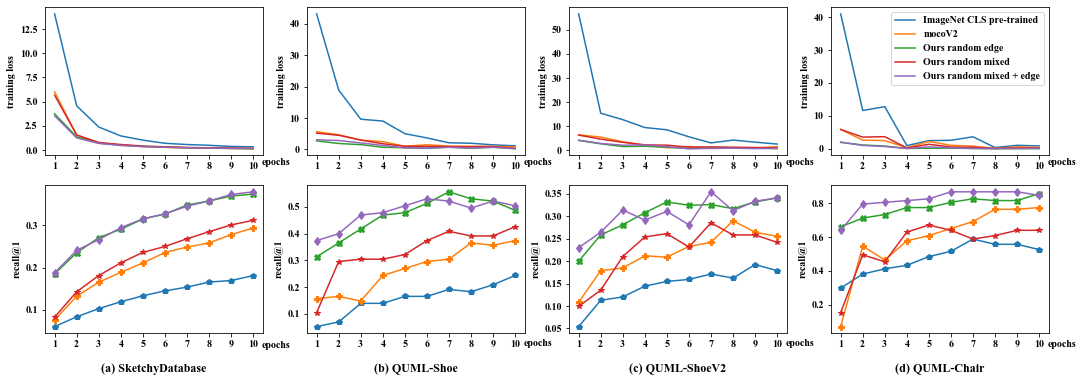

In [21]:
plt.figure(figsize=(18, 6))
for i, log_dir in enumerate(LOGS):
    ax = plt.subplot(240+i+1)
    #ax.set_title(TITLE[i], y=-0.15)
    for j, log_name in enumerate(log_dir):
        if j == 2:
            continue
        tfevent_dir = os.path.join(tfevent_home, log_name)
        tfevent_file = sorted(os.listdir(tfevent_dir))[-1]
        if i == 0:
            target = 'Train/Triplet'
        else:
            target = 'Train/TriLoss'
        record_loss = read_tf_loss(os.path.join(tfevent_dir, tfevent_file), target=target)[:10]
        # print(record_loss)
        x = list(range(1, len(record_loss)+1))
        plt.plot(x, record_loss, label=LABEL[j])
    ax.set_xticks(np.asarray(x, dtype=np.int))
        # plt.xlabel('iterators', x=1)
    if i == 0:
        plt.annotate('epochs', (6, -0.5),xycoords='data', xytext=(10.4, -1.5))
    elif i == 1:
        plt.annotate('epochs', (6, -1.5),xycoords='data', xytext=(10.4, -5))
    elif i == 2:
        plt.annotate('epochs', (6, -1.5),xycoords='data', xytext=(10.4, -6))
    else:
        plt.annotate('epochs', (6, -1.5),xycoords='data', xytext=(10.4, -5))
        
        
    plt.ylabel('training loss')
plt.legend()
for i in range(4):

    # ax = axislines.Subplot(fig, 221+i)
    ax = plt.subplot(245 + i)
    ax.set_title(TITLE[i], y=-0.3)
    # print(ax.axis.keys())
    # ax.axis['top'].set_visible(False)
    # ax.axis['right'].set_visible(False)
    # fig.add_subplot(ax)

    LOG = RECALL_LOGS[i]
    for j, l in enumerate(LOG):
        if j == 2:
            continue
        log_dir = os.path.join(LOG_DIR, LOG_NAME[j], l)
        # print(log_dir)
        if i == 0:
            recall_1 = get_recall1_sketchy(log_dir)[:10]
        elif i == 2:
            recall_1 = get_recall1_list_v2(log_dir)[:10]
        else:
            recall_1 = get_recall1_list(log_dir)[:10]
        # print(recall_1)
        x = list(range(1, len(recall_1)+1))
        ax.plot(x, recall_1, label=LABEL[j], marker=MARKER[j])
    if i == 0:
        plt.annotate('epochs', (6, 0.15), xycoords='data', xytext=(10.4, 0.01))
    elif i == 1:
        plt.annotate('epochs', (6, 0.15), xycoords='data', xytext=(10.4, -0.02))
    elif i == 2:
        plt.annotate('epochs', (6, 0.15), xycoords='data', xytext=(10.4, 0.01))
    else:
        plt.annotate('epochs', (6, 0.15), xycoords='data', xytext=(10.4, -0.05))
    ax.set_xticks(np.asarray(x, dtype=np.int))
    ax.set_ylabel('recall@1')
# plt.legend(loc=1)
plt.savefig('curves_new.pdf')
# plt.show()

<Figure size 432x288 with 0 Axes>

In [18]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": "\n".join([
         r"\usepackage[utf8x]{inputenc}",
         r"\usepackage[T1]{fontenc}",
         r"\usepackage{cmbright}",
    ]),
})

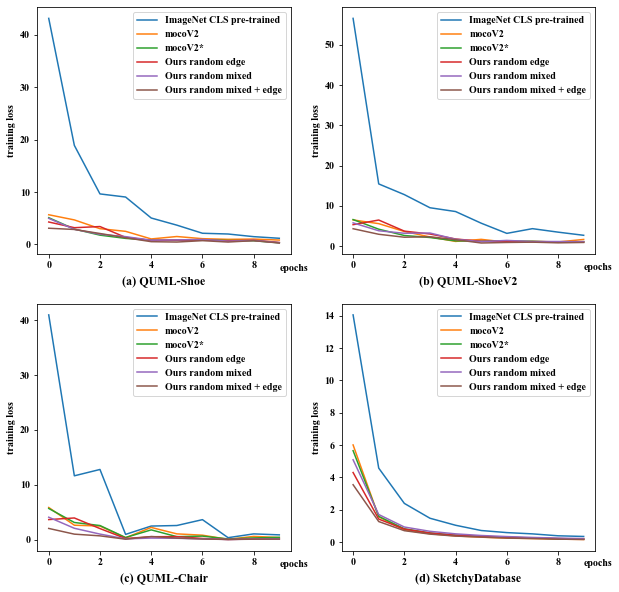

In [12]:
plt.figure(figsize=(16, 6))
for i, log_dir in enumerate(LOGS):
    ax = plt.subplot(240+i+1)
    #ax.set_title(TITLE[i], y=-0.15)
    for j, log_name in enumerate(log_dir):
        tfevent_dir = os.path.join(tfevent_home, log_name)
        tfevent_file = sorted(os.listdir(tfevent_dir))[-1]
        if i == 0:
            target = 'Train/Triplet'
        else:
            target = 'Train/TriLoss'
        record_loss = read_tf_loss(os.path.join(tfevent_dir, tfevent_file), target=target)[:10]
        # print(record_loss)
        x = list(range(1, len(record_loss)+1))
        plt.plot(x, record_loss, label=LABEL[j])
    ax.set_xticks(np.asarray(x, dtype=np.int))
        # plt.xlabel('iterators', x=1)
    if i == 0:
        plt.annotate('epochs', (6, -0.5),xycoords='data', xytext=(10.4, -1.5))
    elif i == 1:
        plt.annotate('epochs', (6, -1.5),xycoords='data', xytext=(10.4, -5))
    elif i == 2:
        plt.annotate('epochs', (6, -1.5),xycoords='data', xytext=(10.4, -6))
    else:
        plt.annotate('epochs', (6, -1.5),xycoords='data', xytext=(10.4, -5))
        
        
    plt.ylabel('training loss')
    #plt.legend()
for i in range(4):

    # ax = axislines.Subplot(fig, 221+i)
    ax = plt.subplot(245 + i)
    ax.set_title(TITLE[i], y=-0.3)
    # print(ax.axis.keys())
    # ax.axis['top'].set_visible(False)
    # ax.axis['right'].set_visible(False)
    # fig.add_subplot(ax)

    LOG = RECALL_LOGS[i]
    for j, l in enumerate(LOG):
        log_dir = os.path.join(LOG_DIR, LOG_NAME[j], l)
        # print(log_dir)
        if i == 0:
            recall_1 = get_recall1_sketchy(log_dir)[:10]
        elif i == 2:
            recall_1 = get_recall1_list_v2(log_dir)[:10]
        else:
            recall_1 = get_recall1_list(log_dir)[:10]
        # print(recall_1)
        x = list(range(1, len(recall_1)+1))
        ax.plot(x, recall_1, label=LABEL[j], marker=MARKER[j])
    if i == 0:
        plt.annotate('epochs', (6, 0.15), xycoords='data', xytext=(10.4, 0.01))
    elif i == 1:
        plt.annotate('epochs', (6, 0.15), xycoords='data', xytext=(10.4, -0.02))
    elif i == 2:
        plt.annotate('epochs', (6, 0.15), xycoords='data', xytext=(10.4, 0.01))
    else:
        plt.annotate('epochs', (6, 0.15), xycoords='data', xytext=(10.4, -0.05))
    ax.set_xticks(np.asarray(x, dtype=np.int))
    ax.set_ylabel('recall@1')
plt.savefig('training_loss.pdf')